<a href="https://colab.research.google.com/github/angadbajwa23/Brain-Image-Segmentation/blob/master/Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd gdrive/My Drive

/content/gdrive/My Drive


In [0]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define data
data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to csv file
savetxt('try.csv', data, delimiter=',')

In [0]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('flair.npz')
# extract the first array
data = dict_data['arr_0']
# print the array
data.shape

(210, 240, 240, 155, 1)

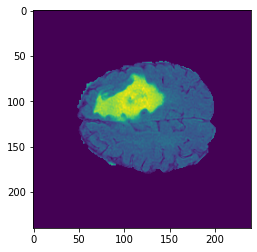

In [0]:
import matplotlib.pyplot as plt
plt.imshow(data[10,:,:,100,0])

In [0]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('t1.npz')
# extract the first array
t1= dict_data['arr_0']
# print the array
t1.shape

(210, 240, 240, 155, 1)

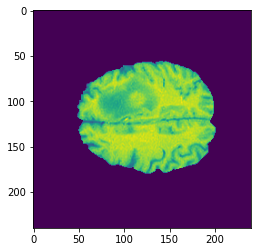

In [0]:
import matplotlib.pyplot as plt
plt.imshow(t1[10,:,:,100,0])

In [0]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('t2.npz')
# extract the first array
t2= dict_data['arr_0']
# print the array
t2.shape

(210, 240, 240, 155, 1)

In [0]:
import matplotlib.pyplot as plt
plt.imshow(t2[10,:,:,100,0])

NameError: ignored

In [0]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('t1ce.npz')
# extract the first array
t1ce= dict_data['arr_0']
# print the array
t1ce.shape

(210, 240, 240, 155, 1)

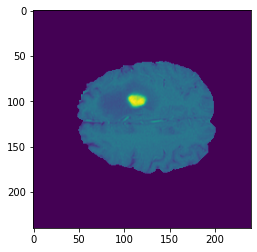

In [0]:
import matplotlib.pyplot as plt
plt.imshow(t1ce[10,:,:,100,0])

In [0]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('label_full.npz')
# extract the first array
label_full= dict_data['arr_0']
# print the array
label_full.shape

(210, 240, 240, 155, 1)

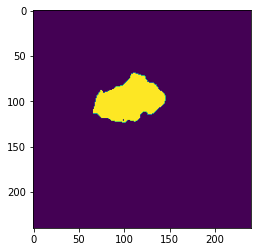

In [0]:
import matplotlib.pyplot as plt
plt.imshow(label_full[10,:,:,100,0])

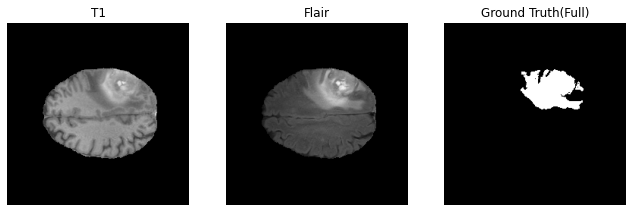

In [0]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

plt.subplot(241)
plt.title('T1')
plt.axis('off')
plt.imshow(t1[90, :, :, 100,0],cmap='gray')

#plt.subplot(242)
#plt.title('T2')
#plt.axis('off')
#plt.imshow(t2[90, 0, :, :],cmap='gray')
    
plt.subplot(242)
plt.title('Flair')
plt.axis('off')
plt.imshow(data[90, :, :, 100,0],cmap='gray')

#plt.subplot(244)
#plt.title('T1ce')
#plt.axis('off')
#plt.imshow(t1ce[90, 0, :, :],cmap='gray')

plt.subplot(243)
plt.title('Ground Truth(Full)')
plt.axis('off')
plt.imshow(label_full[90, :, :, 100,0],cmap='gray')



plt.show()

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.color as color
import random as r
import math
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import Input, merge, UpSampling2D,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

Using TensorFlow backend.


In [0]:
K.set_image_data_format('channels_last')


img_size = 240      #original img size is 240*240
smooth = 0.005 
num_of_aug = 2
num_epoch = 30
pul_seq = 'Flair'
sharp = False       # sharpen filter
LR = 1e-4

num_of_patch = 4 #must be a square number
label_num = 5   # 1 = necrosis+NET, 2 = tumor core,3= original, 4 = ET, 5 = complete tumor
'''
0: other
1: necrosis + NET
2: edema
4: enhancing tumor
5: full tumor
'''

'\n0: other\n1: necrosis + NET\n2: edema\n4: enhancing tumor\n5: full tumor\n'

In [0]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)
    
def unet_model():
    inputs = Input((2, img_size, img_size))
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (inputs)
    batch1 = BatchNormalization(axis=1)(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch1)
    batch1 = BatchNormalization(axis=1)(conv1)
    pool1 = MaxPooling2D((2, 2)) (batch1)
    
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (pool1)
    batch2 = BatchNormalization(axis=1)(conv2)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch2)
    batch2 = BatchNormalization(axis=1)(conv2)
    pool2 = MaxPooling2D((2, 2)) (batch2)
    
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (pool2)
    batch3 = BatchNormalization(axis=1)(conv3)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch3)
    batch3 = BatchNormalization(axis=1)(conv3)
    pool3 = MaxPooling2D((2, 2)) (batch3)
    
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (pool3)
    batch4 = BatchNormalization(axis=1)(conv4)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch4)
    batch4 = BatchNormalization(axis=1)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2)) (batch4)
    
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (pool4)
    batch5 = BatchNormalization(axis=1)(conv5)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (batch5)
    batch5 = BatchNormalization(axis=1)(conv5)
    
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (batch5)
    up6 = concatenate([up6, conv4], axis=1)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same') (up6)
    batch6 = BatchNormalization(axis=1)(conv6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch6)
    batch6 = BatchNormalization(axis=1)(conv6)
    
    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (batch6)
    up7 = concatenate([up7, conv3], axis=1)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (up7)
    batch7 = BatchNormalization(axis=1)(conv7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch7)
    batch7 = BatchNormalization(axis=1)(conv7)
    
    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (batch7)
    up8 = concatenate([up8, conv2], axis=1)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (up8)
    batch8 = BatchNormalization(axis=1)(conv8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch8)
    batch8 = BatchNormalization(axis=1)(conv8)
    
    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (batch8)
    up9 = concatenate([up9, conv1], axis=1)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (up9)
    batch9 = BatchNormalization(axis=1)(conv9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch9)
    batch9 = BatchNormalization(axis=1)(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(batch9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=LR), loss=dice_coef_loss, metrics=[dice_coef])

    return model

In [0]:
train_data=
train_mask=
